<a href="https://colab.research.google.com/github/HyunVinh/AI/blob/main/Chitay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

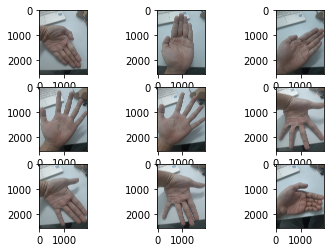

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/chitay/train/Vinh/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + str(i+1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [16]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 97, 97, 64)      

In [17]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/chitay/train',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/chitay/test',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 46 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
history=model.fit(train_dataset,batch_size=10,epochs=20,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/20
5/5 [==============================] - 2s 445ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 2/20
5/5 [==============================] - 2s 416ms/step - loss: 0.0644 - accuracy: 0.9783
Epoch 3/20
5/5 [==============================] - 2s 439ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 2s 400ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 2s 449ms/step - loss: 2.7342e-04 - accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 2s 431ms/step - loss: 1.5345e-04 - accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 2s 419ms/step - loss: 7.4386e-04 - accuracy: 1.0000
Epoch 8/20
5/5 [==============================] - 2s 489ms/step - loss: 5.7504e-06 - accuracy: 1.0000
Epoch 9/20
5/5 [==============================] - 2s 405ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 2s 447ms/step - loss: 7.6715e-05 - accuracy: 1.0000

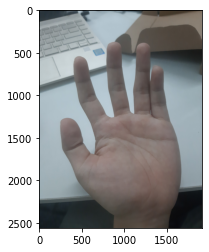

Tay Vinh nè


In [28]:
filename = '/content/drive/MyDrive/Colab Notebooks/chitay/test/Vinh/28.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Tay Hưởng nè')
elif kq ==1:
  print('Tay Vinh nè')

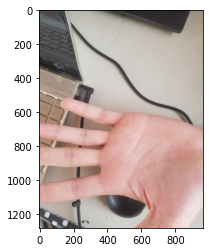

Tay Hưởng nè


In [29]:
filename = '/content/drive/MyDrive/Colab Notebooks/chitay/test/Hưởng/26.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Tay Hưởng nè')
elif kq ==1:
  print('Tay Vinh nè')

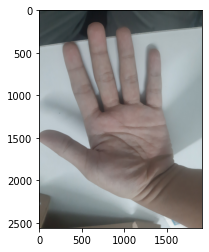

Tay Vinh nè


In [30]:
filename = '/content/drive/MyDrive/Colab Notebooks/chitay/test/Vinh/15.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Tay Hưởng nè')
elif kq ==1:
  print('Tay Vinh nè')

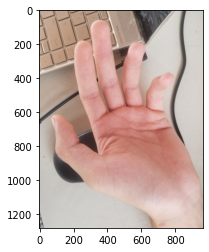

Tay Hưởng nè


In [31]:
filename = '/content/drive/MyDrive/Colab Notebooks/chitay/test/Hưởng/24.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Tay Hưởng nè')
elif kq ==1:
  print('Tay Vinh nè')